# DATA 620 Project 2
## Gabrielle Bartomeo, Zach Dravis, Peter Lombardo, and Hovig Ohannessian

The outlines of the second project included finding a significantly large data set with two or more groups, reducing the size of the data set, and to make inferences about the groups from analysis performed.

## Abstract

We can always remove this part. This would just include a quick summary of what the data set was, what part we looked at, why we were looking at it, how we analyzed it, and what results we got. 6-10 sentences total. This is what I've got so far:

We analyzed weather and rider data provided on [Data.World](https://data.world/colin-lindley/rideaustin-hackathon-driver-happiness) by Colin Lindley from the RideAustin Hackathon.

## Objective

To identify trends between weather in Austin, Texas and driver patterns. We should include in here specific dates (including year) we're looking at too.

## Method

### The Data

A [Data.World](http://data.world/) user by the name of Colin Lindley posted on May 13, 2017 the data from the RideAustin Hackathon. [RideAustin](www.rideaustin.com/) is a nonprofit rideshare program for residents of Austin to get around Austin, driven by others from Austin, sharing their rides and their costs as they go. The data we primarily concerned ourselves with were the weather data and the rides data. The weather data included 1,494,125 rows where each row represented a single ride across 16 columns, where the first column was the ride's identification number and the subsequent columns pertained to the weather - hourly visibility, hourly dry bulb temperature in degrees celsius, et cetera. The rides data had the same number of rows where, again, each row represented a single ride; the difference instead is in the columns which contains information like the driver's identification number, the car make and model, the exact time of the ride, so on and so forth.

### Data Setup

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

We utilized the libraries pandas, networkx, matplotlib's pyplot, and numpy to interact with the data sets in Python. Pandas was used for making the data - stored in comma separated value format (CSV) - able to be manipulated and examined as a data frame. The latter three libraries were used for creating the graphs to visually represent the data.

In [2]:
data_folder = "https://query.data.world/s/{0}"
data_files = ["uvmgp6hbzytw2gt7yiwr4dbxzdakpj", "g47xbkg3i2el2xnkyrbimxpa7czljy", "y7wfzxx3xv6ko6g4ihr73ryrm3uq4u"]

Two variables were created in order to access the data in a cleaner fashion. The first variable, `data_folder`, is a string identifying the folder where the data is stored. The second, `data_files`, is a list of strings that contains the name of each data file to be used.

In [3]:
weather = pd.read_csv(data_folder.format(data_files[0]))

In order to bring in the weather data, we used pandas to read the CSV at its stored location online and bring it into the variable `weather`.

In [4]:
rides_a = pd.read_csv(data_folder.format(data_files[1]))
rides_b = pd.read_csv(data_folder.format(data_files[2]))
rides = pd.concat([rides_a, rides_b, weather], axis=1, join='inner')

C:\Users\Lil Star\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Again, we used the pandas library to bring in the rider data that was split into two parts, so-named `rides_a` and `rides_b`. This data was then joined with the weather data in a new variable, `rides`.

### Data Cleanup

Due to the immensity of the data, the group quickly realized how necessary it was to resize the data. Additionally, the data's temperature was to be converted to Fahrenheit to be more easily understood by the group and class.

In [5]:
rides['started_on_date'] = pd.to_datetime(rides['started_on']).dt.date
rides['started_on_date'] = pd.to_datetime(rides['started_on_date'])
rides['started_on_month'] = rides['started_on_date'].dt.month
rides.groupby('started_on_month')
rides.loc[:,"HOURLYDRYBULBTEMPC"].var()
rides.groupby(['started_on_month'])['HOURLYDRYBULBTEMPC'].agg(['var'])

,var
started_on_month,
1,51.745390
2,36.160938
3,26.077065
4,18.620622
6,9.090395
7,12.757090
8,12.769961
9,15.763318
10,26.807124


A quick examination of the variability of temperature from each month found that December would be the best month to use as there was a wide range of temperatures but none that seemed extreme or otherwise ridiculous, like January.

In [6]:
rides = rides[rides['started_on_month'] == 12]

The data was resized as a result to only include those in the month of December. About ninety percent of all the rides were eliminated from future analysis as a result.

In [7]:
rides_by_temp = rides[rides["HOURLYDRYBULBTEMPC"].notnull()].copy()
rides_by_temp["HOURLYDRYBULBTEMPF"] = rides_by_temp["HOURLYDRYBULBTEMPC"].apply(lambda x: float(round(x * 9/5 + 32)))
rides_by_temp["driver_id"] = rides_by_temp["driver_id"].apply(lambda x: str(x))
rides_by_temp = rides_by_temp[["driver_id", "HOURLYDRYBULBTEMPF"]]

By focusing the data down to December, we ended up with a data set that had 157,870 rows. Each row represents a ride, with driver's identification number and the temperature in Fahrenheit when the ride occurred. The temperatures in December ranged from 23 degrees Fahrenheit to 84 degrees Fahrenheit.

In [8]:
edges = rides_by_temp.apply(lambda x: (x["driver_id"], x["HOURLYDRYBULBTEMPF"]), axis=1)
G = nx.Graph()
G.add_nodes_from(list(set(rides_by_temp["driver_id"].tolist() + rides_by_temp["HOURLYDRYBULBTEMPF"].tolist())))
G.add_edges_from(edges)

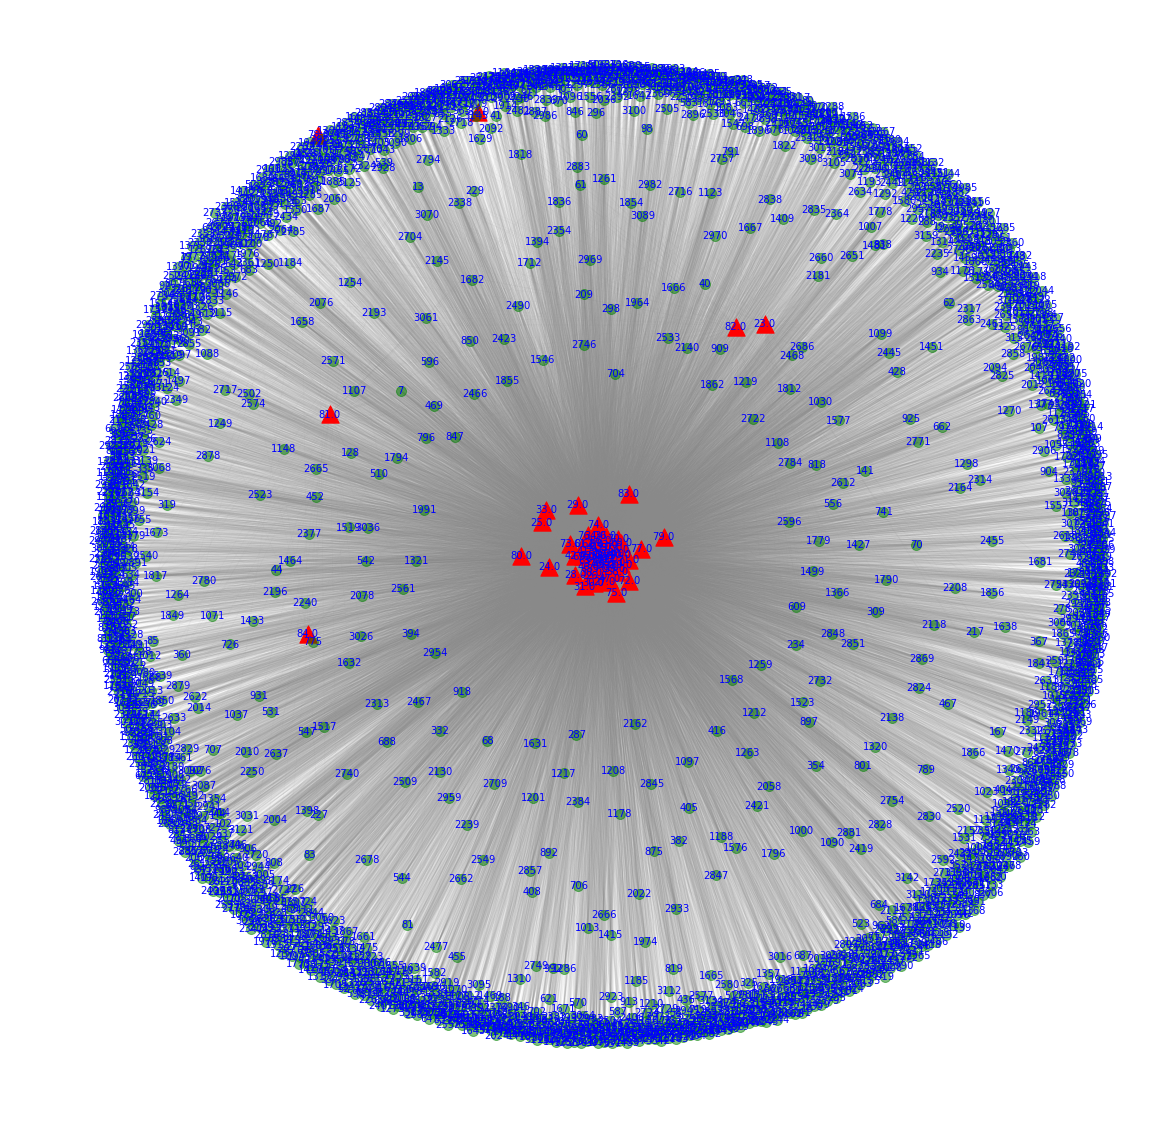

In [9]:
pos = nx.spring_layout(G,k=1.55,iterations=80)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y)
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(G, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.05)
nx.draw_networkx_nodes(G, pos, nodelist=list(set(rides_by_temp["HOURLYDRYBULBTEMPF"].tolist())), node_color="r", node_shape="^", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=list(set(rides_by_temp["driver_id"].tolist())), node_color="g", alpha=0.5, node_shape="o", node_size=100)
plt.axis('off')
plt.show()

The result is a bipartite graph. There are some temperatures with fewer drivers attached to them than others. Presumably, these are the two that are difficult to read hiding amongst the driver nodes.

## Analysis

Yarr, here dere be code, graphs, an' statistics with a healthy dose of writin'!

Don't ask why I wrote it in pirate. We won't do the project in pirate. But if you're actually reading you'll notice this. Also, hi, how are you doing today?

## Inference

All text. Write a lot.

## Conclusion

6-8 sentences summing up our findings.